# Logistic Regression Parkinson

Lizbeth Peralta Malváez, Omar López Rincón

Universidad de las Américas Puebla

La regresión logística permite clasificar más que inferir o predecir. Se utiliza la función sigmoidea y por eso el nombre de logística.

Un método utilizado para la regresión logística es el de máximo de verosimilitud, el cual completa el valor de una variable cuando no la conoce. Se puede utilizar para multiclase y para clasificación binaria.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [3]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')
data.head()
# se agrega una columna de avance, 1 el avance de parkinson es 
#alto y 0 no es grave 
data['avance'] = (data.total_UPDRS > 50).astype(int)

%matplotlib inline

In [4]:
data.groupby('avance').mean()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
avance,,,,,,,,,,,,,,,,,,,,,
0,21.075062,64.532674,0.329742,92.116176,20.764101,28.087600,0.006165,0.000044,0.002999,0.003280,...,0.309115,0.017075,0.020014,0.027220,0.051226,0.032593,21.728888,0.542127,0.651658,0.218044
1,32.633803,72.042254,0.000000,112.735109,35.441319,53.776033,0.005848,0.000042,0.002686,0.003192,...,0.359995,0.019294,0.023605,0.034402,0.057880,0.019536,20.366526,0.524092,0.695287,0.260664


In [5]:
data.groupby('total_UPDRS').mean()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,avance
total_UPDRS,,,,,,,,,,,,,,,,,,,,,
7.0000,18,65,0,126.835296,5.58807,0.004301,0.000033,0.002049,0.002234,0.006149,...,0.012881,0.014766,0.019737,0.038641,0.014159,24.527833,0.436708,0.659938,0.170610,0
7.0881,22,57,1,89.854000,7.06300,0.002850,0.000013,0.001375,0.001280,0.004130,...,0.008850,0.009710,0.011985,0.026550,0.019356,29.844500,0.291130,0.625215,0.125881,0
7.0882,22,57,1,89.853000,7.06300,0.002630,0.000012,0.001270,0.001450,0.003810,...,0.006400,0.008620,0.013020,0.019200,0.006787,28.585000,0.390430,0.679840,0.131910,0
7.0883,22,57,1,89.852000,7.06310,0.001883,0.000008,0.000937,0.001037,0.002813,...,0.006490,0.007780,0.011243,0.019473,0.002434,29.443333,0.402490,0.658937,0.085122,0
7.0982,18,65,0,88.373333,6.00000,0.004130,0.000028,0.002035,0.002040,0.006107,...,0.022735,0.020422,0.027343,0.068205,0.011618,23.606667,0.411852,0.661073,0.160865,0
7.1698,18,65,0,81.355000,6.00000,0.003740,0.000025,0.001790,0.002040,0.005380,...,0.009330,0.012160,0.016630,0.027980,0.014811,25.762000,0.470250,0.579640,0.178480,0
7.1699,18,65,0,81.353000,6.00000,0.002672,0.000020,0.001178,0.001466,0.003530,...,0.009124,0.011394,0.018672,0.027370,0.010043,25.051600,0.422732,0.610230,0.110415,0
7.2409,18,65,0,74.388667,6.00000,0.003440,0.000024,0.001710,0.001800,0.005130,...,0.009453,0.010967,0.014700,0.028350,0.012390,23.142000,0.447060,0.599237,0.149710,0
7.2410,18,65,0,74.386667,6.00000,0.010823,0.000079,0.006677,0.004987,0.020030,...,0.027340,0.026117,0.033340,0.082010,0.033706,17.290667,0.540277,0.614530,0.224057,0


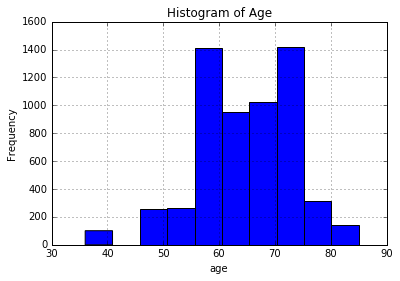

In [6]:
# histograma de edad
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('Frequency')

In [7]:
y, X = dmatrices('avance ~ age + total_UPDRS',
                  data, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'age', 'total_UPDRS'], dtype='object')


In [8]:
# Regresion logistica
model = LogisticRegression()
model = model.fit(X, y)

# Certezas
model.score(X, y)

C:\Users\Liz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.99387234042553196

In [9]:
# Para evaluar, se utiliza el 30% de la base de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Liz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# predicción de clases
predicted = model2.predict(X_test)
print (predicted)

[ 0.  1.  0. ...,  0.  0.  0.]


In [12]:
# probabilidaddes
#si la segunda columnda es mayor a 0.5, la persona tiene un avance con el parkinson
probs = model2.predict_proba(X_test)
print (probs)

[[  9.97677922e-01   2.32207843e-03]
 [  2.08334307e-01   7.91665693e-01]
 [  9.99961990e-01   3.80098035e-05]
 ..., 
 [  9.99999486e-01   5.13650384e-07]
 [  9.99992346e-01   7.65448694e-06]
 [  9.99999975e-01   2.52723583e-08]]


In [14]:
# evaluación
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.990924560408
0.998257976121


Se puede apreciar que los años con más probabilidad de padecer parkinson es entre los 60 y 70 años.